# An analysis of the influence of Black Southern Churches on the Southern Black Community

## Background:

Documenting the American South is one of the longest running digital publishing initiatives at the University of North Carolina. It was designed to give researchers digital access to some of the library’s unique collections in the form of high quality page scans as well as structured, corrected and machine readable text. (https://docsouth.unc.edu/docsouthdata/)

## Goal: 

Analyze rhetoric of the Black Southern Church in the American South and it's effects on documents written by self emancipated and previously enslaved Black people.

## Research question:

Are there any measurable similaries between the themes of documents from Southern Black churches and the documents from self-emancipated and freed Black people? 

## Approach:

[Documenting The American South](https://docsouth.unc.edu/) is one of the longest running efforts by the University of North Carolina to collect, digitize, and publish documents from self-emancipated and freed Black people. Using [DocSouth Data](https://docsouth.unc.edu/docsouthdata/) and data from the [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html), analyze the correlation between autobiographies, biographies, church documents, sermons, histories, encyclopedias, and other published materials from Southern Black churches and the narratives of slaves in regards to religion.

Proposed analysis:

- Evaluate language of both data sets
- Evaluate themes of both data sets
- Using data from the [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html), develop a theme predictor for texts
- Evaluate how much (if any) thematic overlap there is between religious texts and slave narratives

## Repo contents:
- [SouthernBlackChurchRhetoric](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/SouthernBlackChurchRhetoric.ipynb) contains all analysis.
- [Scrape_website](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/scrape_website.py) contains the functions used to obtain [Religious Text Content Guide](https://docsouth.unc.edu/neh/religiouscontent.html) data.
- [Utils](https://github.com/jaded-gloryy/doc-south-analysis/blob/main/utils.py) contains generic functions for parsing an html document.


data: 
https://www.kaggle.com/datasets/docsouth-data/the-church-in-the-southern-black-community
https://docsouth.unc.edu/neh/religiouscontent.html

note from kaggle compiler:
If you make use of this data, considering letting the holder of the original collection know how you are using the data and if you have any suggestions for making it even more useful. Send any feedback to wilsonlibrary@unc.edu.

### Data preprocessing

##### Get content guide data

Data was scraped from [religious text content guide data](https://docsouth.unc.edu/neh/religiouscontent.html).

In [1]:
# import data scraped from the web and turn it into a df
import pandas as pd
from pandas import DataFrame as df
from scrape_website import scrape_data, custom_filter, build_dict
url = "https://docsouth.unc.edu/neh/religiouscontent.html"
tag_list = scrape_data(url=url, filter=custom_filter)
data_dict = build_dict(tag_list=tag_list)
content_guide_data = df.from_dict(data_dict)
content_guide_data = content_guide_data.dropna(subset="page_link")
content_guide_data

,theme,alt_theme,author,title,year,page_numbers,page_link
0,Baptism,None,"Brown, Henry Box, and Charles Stearn",Narrative of Henry Box Brown,1849,23-24,/neh/boxbrown/boxbrown.html#p23
1,Baptism,None,"Brown, Josephine",Biography of an American Bondman,"1856, c1855",23-24,/neh/brownj/brownj.html#brownj23
2,Baptism,None,"Brown, Rebecca Warren[?]",Memoir of Mrs. Chloe Spear,1832,38-40,/neh/brownrw/brownrw.html#spear38
3,Baptism,None,"Henry, George",Life of George Henry,1894,42-43,/neh/henryg/henryg.html#henry42
4,Baptism,None,"Johnson, Thomas Lewis",Twenty-Eight Years a Slave,1909,17,/neh/johnson1/johnson.html#john17
...,...,...,...,...,...,...,...
388,Spirituals,None,"Capehart, L. C.",Reminiscences of Isaac and Sukey,1907,11,/neh/capehart/capehart.html#cape11
389,Spirituals,None,"Foster, G. L. (Gustavus Lemuel)",Uncle Johnson,"Foster, G. L. (Gustavus Lemuel",70-71,/neh/foster/foster.html#foster70
390,Spirituals,None,"Jones, Friday",Days of Bondage,1883,17-18,/neh/fjones/jones.html#jones17
391,Spirituals,None,"Pickard, Kate E. R.",The Kidnapped and the Ransomed,1856,179-180,/neh/pickard/pickard.html#pickard179


In [2]:
# there's a typo in this table. Replace title with appropriate year
non_num_yrs = content_guide_data["year"].str.isnumeric() == False
content_guide_data[non_num_yrs]

change_dict = {
        "Offley, G. W. (Greensbury Washington":"1859",
        "Latta, M. L. (Morgan London":"1903",
        "Jamison, M. F. (Monroe Franklin":"1912",
        "Brinch, Boyrereau and Prentiss, Benjamin F. (Benjamin Franklin":"1817",
        "Foster, G. L. (Gustavus Lemuel":"1860",
        "Bradford, Sarah H. (Sarah Hopkins":"1869",
        "Green, J. D. (Jacob D.":"1864",
        "E. M. W. (Elizabeth Merwin Wickham":"1869"
    }

# replace years
content_guide_data["year"] = content_guide_data["year"].replace(change_dict)


In [3]:
# replace remaining non-numeric years
# find years "publ.?" where title says "Experience and Personal Narrative of Uncle Tom." and replace with "1854"
publ_string = content_guide_data["year"].str.contains("publ.?")
string_1854 = "Experience and Personal Narrative of Uncle Tom"
find_1854 = content_guide_data["title"].str.contains(string_1854)
publ_1854 = content_guide_data[publ_string & find_1854]

# update values that should say 1854
content_guide_data["year"].loc[publ_1854.index] = "1854"

# find years "publ.?" where title says "Sketch of the Life of Mr. Lewis Charlton" and replace with "1870"
string_1870 = "Sketch of the Life of Mr. Lewis Charlton"
find_1870 = content_guide_data["title"].str.contains(string_1870)
publ_1870 = content_guide_data[publ_string & find_1870]

# content_guide_data_updated = content_guide_data[publ_string & find_1870].replace("publ.?","1870")
content_guide_data["year"].loc[publ_1870.index] = "1870"


#### Get text data from the documents in the content guide

##### The next 3 cells contain code to grab text from specific pages of each document in the content_guide_data.

The output of the code below is saved in thematic_text.txt. Since this only needs to be performed once, the code is commented out.

In [4]:
# # get text files from links in page column
# from scrape_website import combine_url,get_pages_from_url, get_page_list
# base_url = "https://docsouth.unc.edu"
# #replace roman numeral ranges and typo from website
# content_guide_data = content_guide_data.replace({"page_numbers":{"iv-viii":"iv,v,vi,vii,viii", "vi-viii":"vi,vii,viii","28-19":"28-29"}})
# page_numbers = content_guide_data["page_numbers"]
# page_urls = content_guide_data["page_link"]

# full_links = combine_url(base_url=base_url, specific_url=list(page_urls))
# page_num_list = list(page_numbers)

# # get a list of pages
# page_ranges = []
# for page in page_num_list:
#     page_ranges.append(get_page_list(page))
# # manual page update for 
# page_ranges[374] = ["9","16"]

# thematic_texts = get_pages_from_url(urls=full_links, pages=page_ranges)

# with open('thematic_text.txt', 'w') as f:
#     for line in thematic_texts:
#         f.write(line)
#         f.write("\n")

In [5]:
# # manual text update
# thematic_texts[45] = """

# About Christmas, my master would give four or five days' holiday to his slaves; during which time, he supplied them plentifully with new whiskey, which kept them in a continual state of the most beastly intoxication. He often absolutely forced them to drink more, when they had told him they had had enough. He would then call them together, and say, "Now, you slaves, don't you see what bad use you have been making of your liberty? Don't you think you had better have a master, to look after you, and make you work, and keep you from such a brutal state, which is a disgrace to you, and would ultimately be an injury to the community at large?" Some of the slaves, in that whining, cringing manner, which is one of the baneful effects of slavery, would reply, "Yees, Massa; if we go on in dis way, no good at all."

#         Thus, by an artfully-contrived plan, the slaves themselves are made to put the seal upon their own servitude. The masters, by the system, are rendered as cunning and scheming as the slaves themselves.

#         "Joe," said a master, "if you will work well for me, you shall be buried in my grave." The slave said nothing, in reply; but thought, Massa is a bad man, and that he would not like to be buried near him. The slave thought he had been too near his master, all his life, and had rather be away from him, when he died. Seeing the slave idling, "Joe," shouted his master, "have you forgotten what I promised you, if you work well?" "No, Massa, me bemember; but me don't want." "What for, Joe?" "Because de debbil might some day come, and steal me away, in mistake for you, Massa." His master was silent on this subject ever afterwards.
# """

The output of the code below is saved in cleaned_thematic_text.txt. Since this only needs to be performed once, the code is commented out.

In [6]:
# # clean up and save output to a txt for future use
# from scrape_website import clean_up_text
# cleaned_thematic_texts = []
# for text in thematic_texts:
#     new_text = clean_up_text(text)
#     cleaned_thematic_texts.append(new_text)

# # save cleaned text to a txt file
# with open('cleaned_thematic_text.txt', 'w') as f:
#     for line in cleaned_thematic_texts:
#         f.write(line)
#         f.write("\n")
# cleaned_thematic_texts

In [7]:
# reading in data from txt
ctt = open("cleaned_thematic_text.txt", "r")
data = ctt.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
data_into_list = data.split("\n")
len(data_into_list)
#removing the last empty line
thematic_texts = data_into_list[:388]
ctt.close()


#### Read in table of contents data

The following code prepares DocSouth general data for analysis.

In [8]:
import pandas as pd
# from pandas import DataFrame as df
from  config import CONFIG

#read in toc table
#replace .xml with .txt for filenames
# remove anything in [] from txt files
toc_data = CONFIG["TOC_FILEPATH"]
contents_table = pd.read_csv(toc_data)
txt_filename = contents_table.Filename.str.replace(".xml", ".txt")

# get every entry, drop .xml and replace it with .txt
contents_table["txt_filename"] = txt_filename

# make new table
specified_content_cols = ["txt_filename", "Date", "Author", "Title"]
content_ref_table = contents_table[specified_content_cols]

/var/folders/18/918s5vr16kl9091zgnswr5gm0000gn/T/ipykernel_25425/231671236.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  txt_filename = contents_table.Filename.str.replace(".xml", ".txt")


In [9]:
# rename date column and lower other col names
content_ref_table = content_ref_table.rename(columns={"Date":"year"})
content_ref_table.columns = content_ref_table.columns.str.lower()
content_ref_table

,txt_filename,year,author,title
0,church-ridgel-ridgel.txt,1896,Alfred Lee Ridgel,Africa and African Methodism
1,church-bowen-bowen.txt,1896,J. W. E. Bowen,Africa and the American Negro: Addresses and P...
2,neh-johnsontl-johnsontl.txt,1892,Thomas L. Johnson,Africa for Christ. Twenty-Eight Years a Slave
3,church-turneral-turner.txt,1893,Henry McNeal Turner,African Letters
4,church-gaineswj-gaines.txt,1890,W. J. Gaines,"African Methodism in the South; or, Twenty-Fiv..."
...,...,...,...,...
139,church-wheeler-wheeler.txt,1906,B. F. Wheeler,The Varick Family
140,church-cooper-cooper.txt,1892,Anna J. Cooper,A Voice from the South
141,neh-wilkerson-wilkerson.txt,1861,Major James Wilkerson,Wilkerson's History of His Travels &amp; Labor...
142,church-brawley-brawley.txt,c1919,Benjamin Griffith Brawley,Women of Achievement: Written for the Fireside...


### Thematic text analysis

In [10]:
# tokenize texts
# combine relevant content data with texts
# from pandas import DataFrame as df
thematic_data_df = content_guide_data[["theme","title","year"]].reset_index(drop=True)
them_df= df(thematic_texts, columns=["text"])
new_df = pd.concat([thematic_data_df,them_df],axis=1)
new_df

,theme,title,year,text
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien..."
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ..."
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...
...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ..."


In [11]:
# themes pre-analysis
themes = new_df["theme"]
themes.value_counts()

Religious practice                                                                                          48
Religious experience, positive                                                                              32
Literacy:  includes learning to read and write, further education, and experiences related to literacy      31
Conversion experience                                                                                       28
Spirituals                                                                                                  24
Sabbath, slaves' observance                                                                                 23
Bible                                                                                                       21
Condemnation of masters                                                                                     19
Marriage                                                                                                    19
M

<Axes: title={'center': 'Number of samples for each Theme'}, xlabel='Samples', ylabel='Theme'>

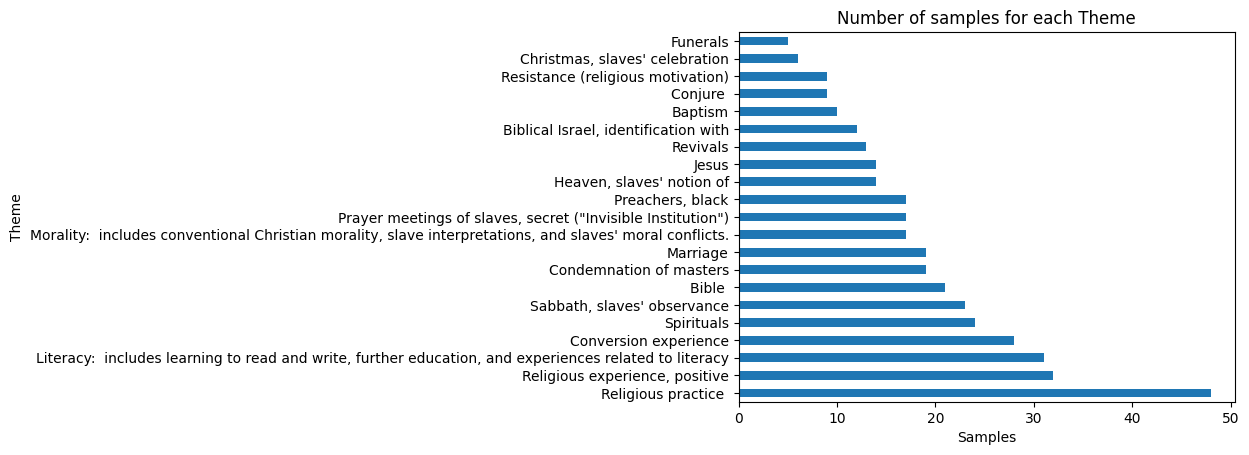

In [12]:
#get hist of themes
themes.value_counts().plot.barh(ylabel='Theme', xlabel='Samples', title="Number of samples for each Theme")

In [12]:
themes.value_counts().shape

(21,)

In [13]:
theme_val_ct = themes.value_counts().to_frame().reset_index()
theme_val_ct = theme_val_ct.rename(columns={"index":"theme", "theme":"count"})
theme_val_ct

,theme,count
0,Religious practice,48
1,"Religious experience, positive",32
2,Literacy: includes learning to read and write...,31
3,Conversion experience,28
4,Spirituals,24
5,"Sabbath, slaves' observance",23
6,Bible,21
7,Condemnation of masters,19
8,Marriage,19
9,Morality: includes conventional Christian mor...,17


In [13]:
# thematic_texts

In [14]:
# import nltk
# nltk.download('stopwords')

In [14]:
# gather all texts by their theme
from nlp_utils import list_to_str

texts_by_theme = []
theme_names = list(themes.unique())
for theme in theme_names:

    theme_mask =  new_df["theme"] == theme 
    text_to_combine = new_df[theme_mask]["text"].values
    new_text = list_to_str(text_to_combine)
    texts_by_theme.append(new_text)

len(texts_by_theme)

21

In [30]:
texts_by_theme[1]

"   brick of clay, and to the dust of clay it returns again, the same way God made us, unto dust we return again. Aaron's views of poor feeble hollow hearted dying men.           A great many people tell me about this awful bad amalgamation business, and they think when friendly people took me in and set me down to the table to eat with them, and when their acquaintances come in to see them, and see Aaron sitting up to the table eating with them it draws a dead damp on them, it is like Adne and Anthony. Aaron thinks if they would only look in the South where I come from, it will be a complete ballot box for them, they would put their hand right on their mouth and never utter another word about amalgamation, or any thing else. In the South white man wont suffer black man to look at white woman, but they will go and force black woman, and there  aint  eh or Anthony said about it. The very old devil has got his own foot right on the slave holders own neck, and Aaron thinks the poor slave 

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jadeevans/nltk_data...


True

In [17]:
# tokenize texts
from nlp_utils import lemmatize_words, remove_stopwords

extra_stopwords = ["" , " ", "\n", "'s"]
tokenized_themetxt=[]

for text in texts_by_theme:
    base_text = remove_stopwords(text, extra_stopwords)
    lemmatized = lemmatize_words(base_text)
    tokenized_themetxt.append(lemmatized)

len(tokenized_themetxt)

21

In [18]:
# clean up theme names for readability
clear_theme_names = []

for name in theme_names:

    is_literacy = True if name.find("Literacy") != -1 else False
    is_morality = True if name.find("Morality") != -1 else False
    is_prayer = True if name.find("Prayer meetings") != -1 else False

    if is_literacy:
        clear_theme_names.append("Literacy")
    elif is_morality:
        clear_theme_names.append("Morality")
    elif is_prayer:
        clear_theme_names.append("Prayer")
    else:
        clear_theme_names.append(name)
clear_theme_names

['Baptism',
 'Bible ',
 'Biblical Israel, identification with',
 "Christmas, slaves' celebration",
 'Condemnation of masters',
 'Conjure ',
 'Conversion experience',
 'Funerals',
 "Heaven, slaves' notion of",
 'Jesus',
 'Literacy',
 'Marriage',
 'Morality',
 'Prayer',
 'Preachers, black',
 'Religious experience, positive',
 'Religious practice ',
 'Resistance (religious motivation)',
 'Revivals',
 "Sabbath, slaves' observance",
 'Spirituals']

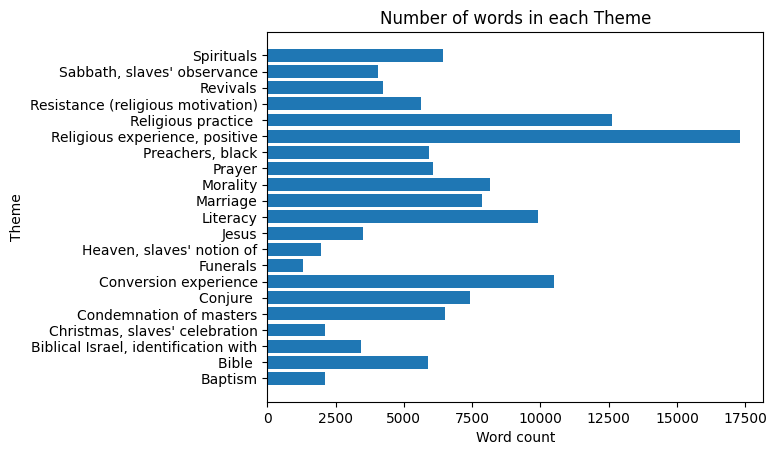

In [18]:
# plot len of words
import matplotlib.pyplot as plt

#x = theme, y = len(tokenized text)
num_words = [len(word_list) for word_list in tokenized_themetxt]
fig, ax = plt.subplots()
ax.barh(clear_theme_names,num_words)
ax.set_title("Number of words in each Theme")
ax.set_ylabel("Theme")
ax.set_xlabel("Word count")
plt.show()

In [19]:
# get all the word counts
from nlp_utils import get_word_counts
thematic_word_counts = []
for text in tokenized_themetxt:
    word_count = get_word_counts(text)
    thematic_word_counts.append(word_count)


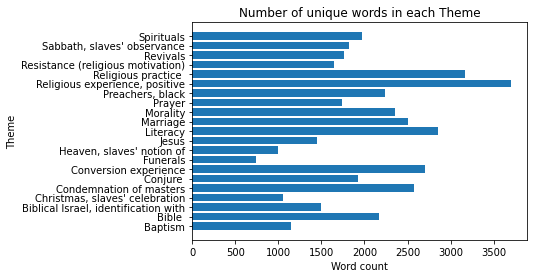

In [20]:
import matplotlib.pyplot as plt
# plot len of unique words
#x = theme, y = len(unique tokenized text)
unique_words = []
for each in thematic_word_counts:
    unique_words.append(list(each.keys()))

num_unique_words = [len(words) for words in unique_words]
fig, ax = plt.subplots()
ax.barh(clear_theme_names,num_unique_words)
ax.set_title("Number of unique words in each Theme")
ax.set_ylabel("Theme")
ax.set_xlabel("Word count")
# plt.xticks(rotation = 90)
plt.show()

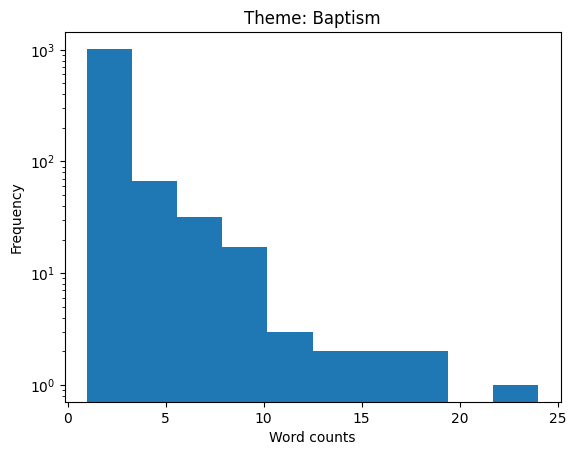

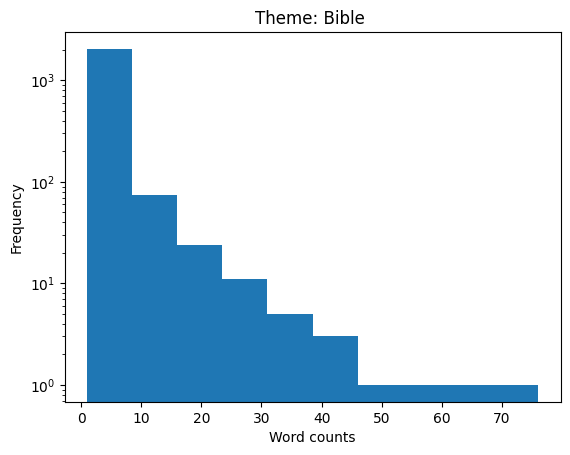

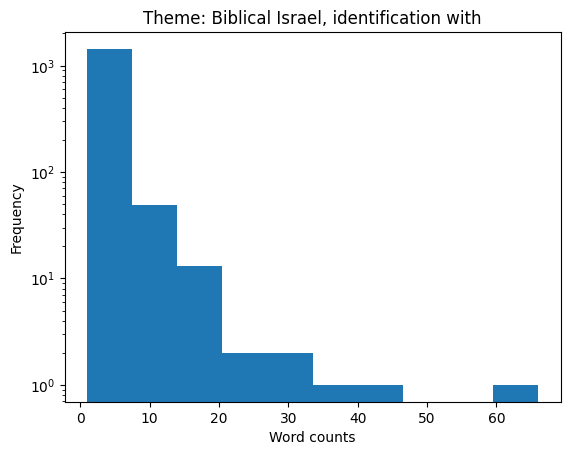

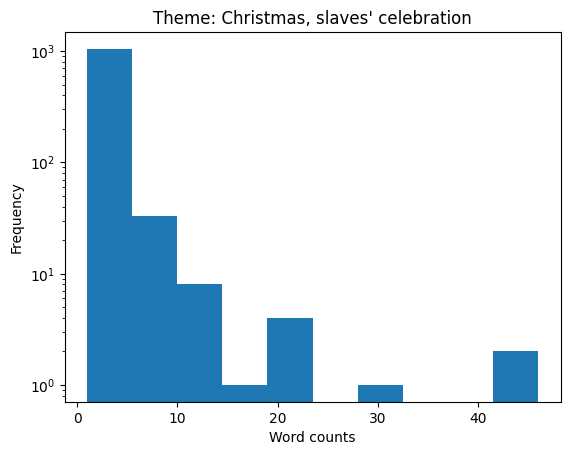

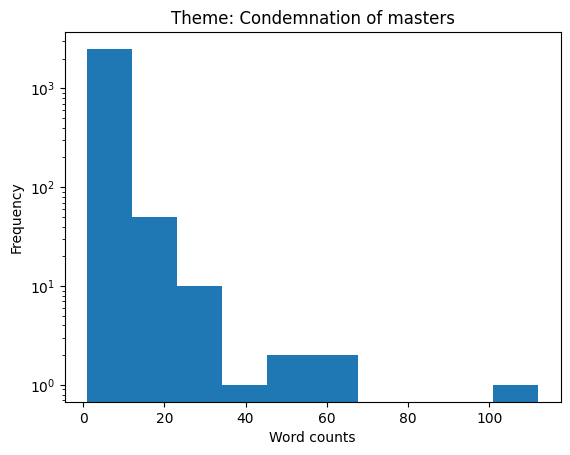

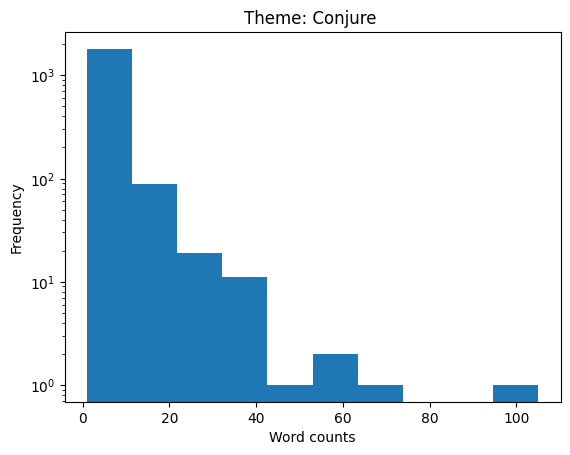

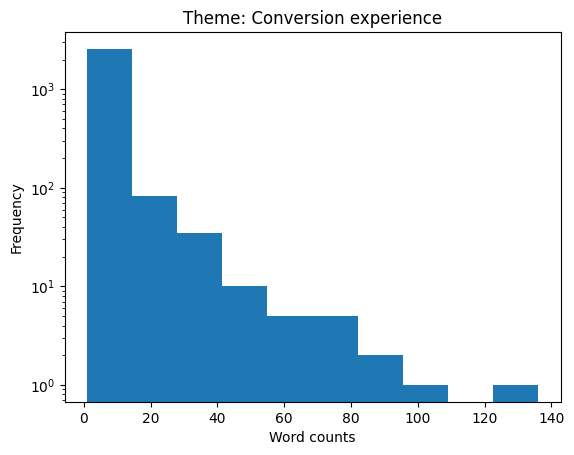

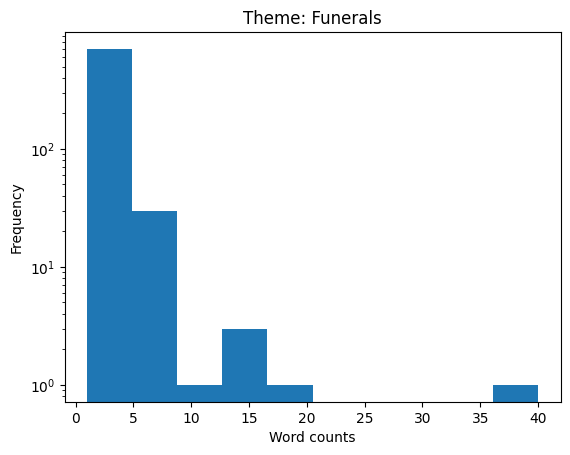

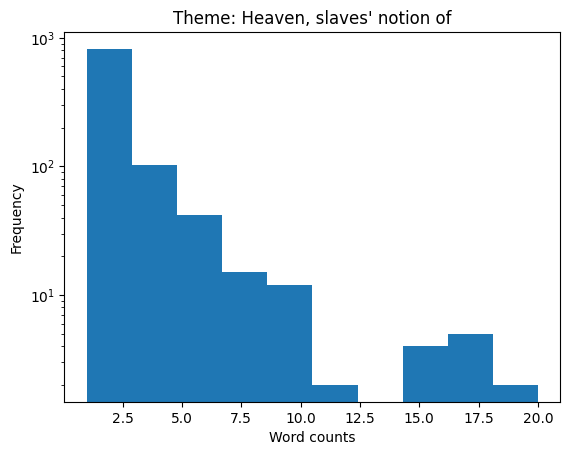

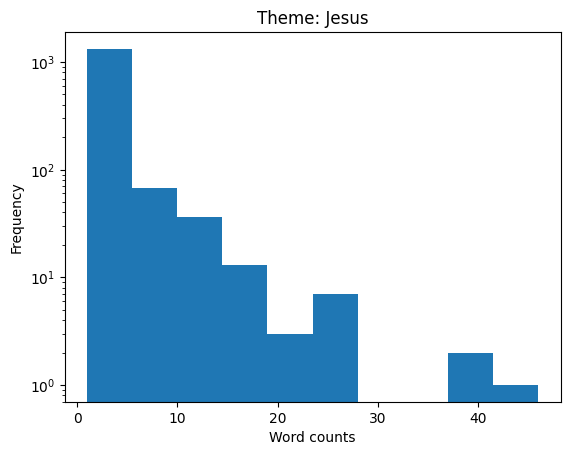

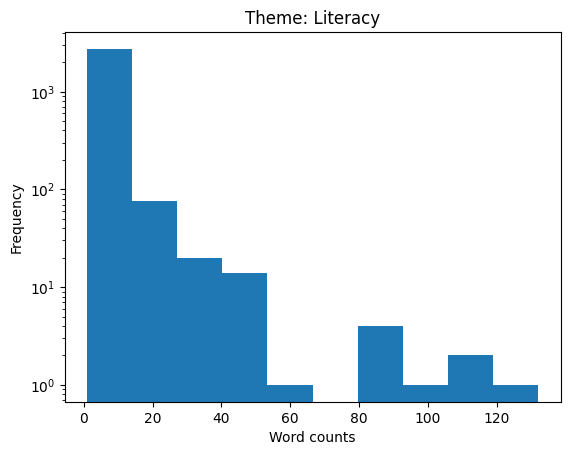

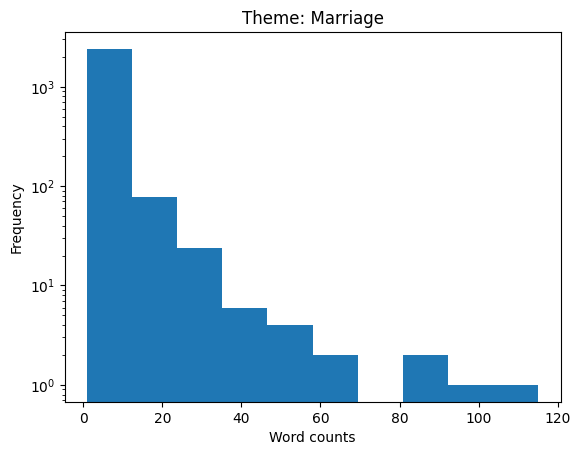

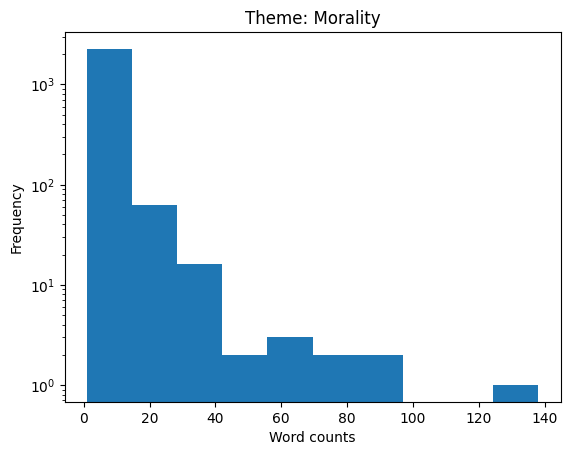

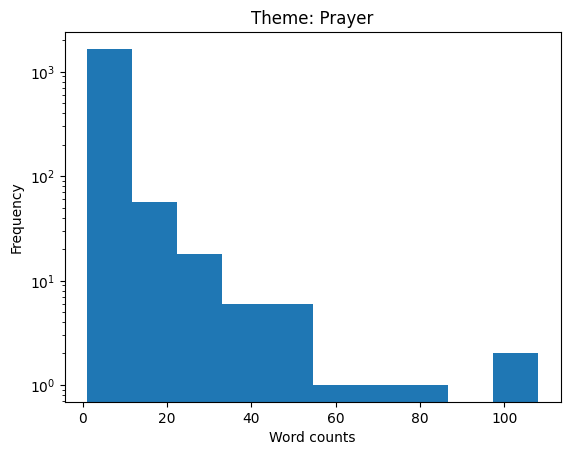

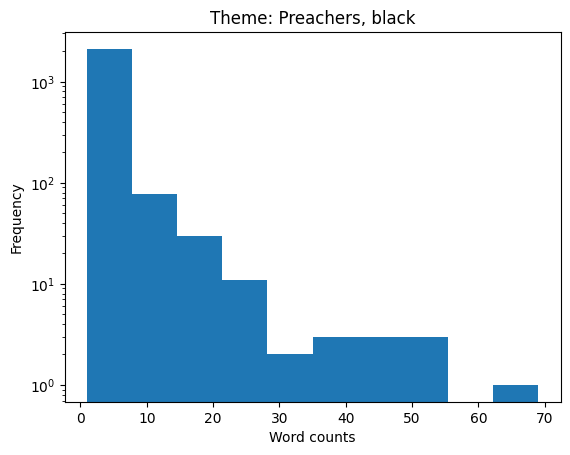

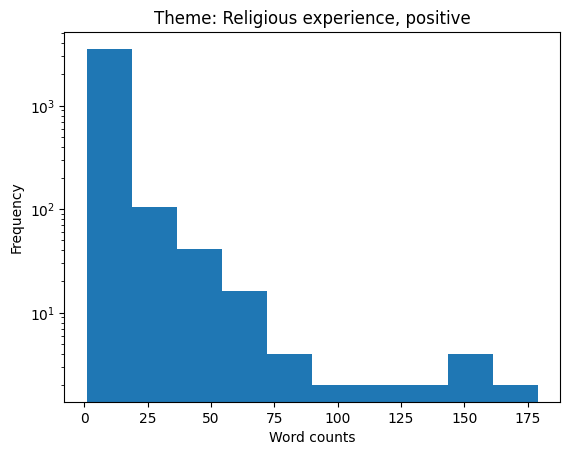

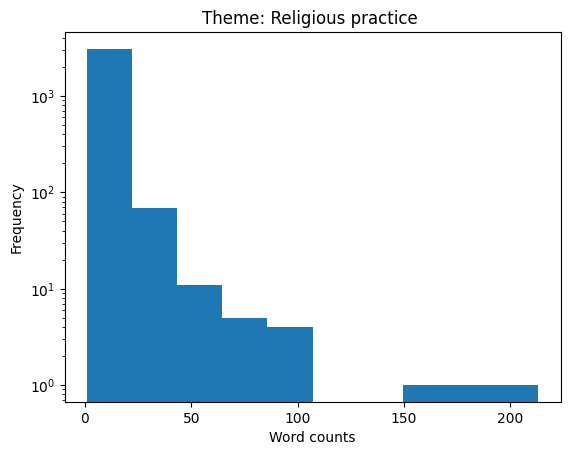

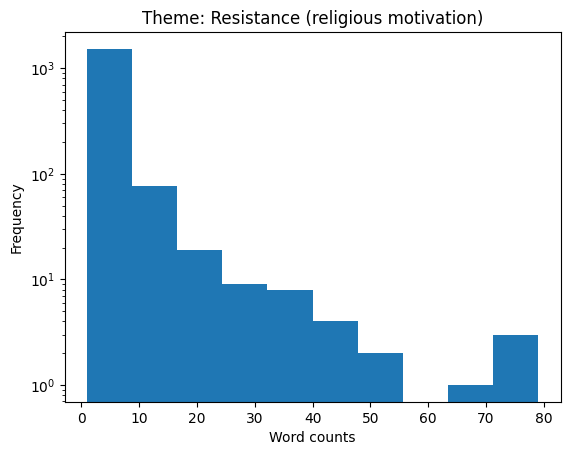

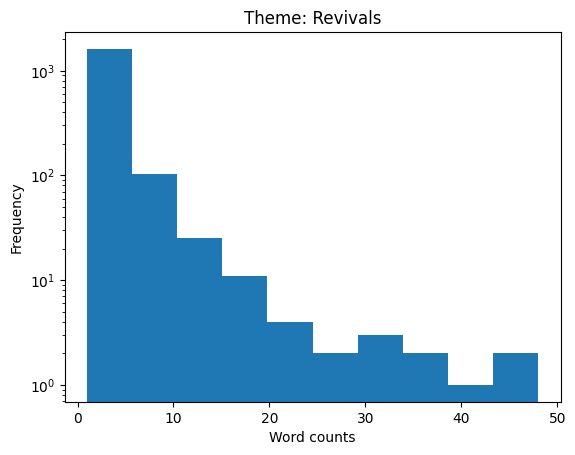

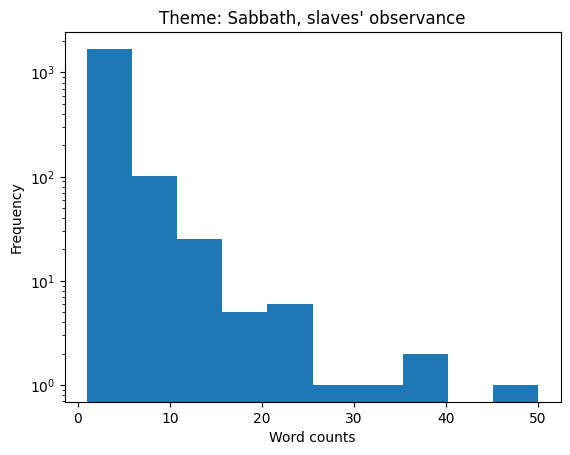

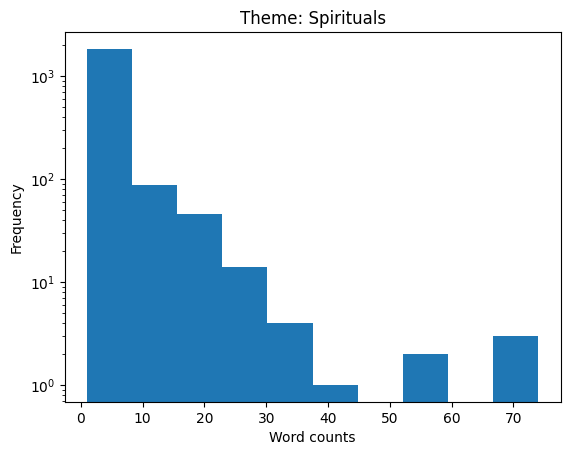

In [21]:
# plot spread of word counts
import matplotlib.pyplot as plt


for i in range(len(clear_theme_names)):
    theme_name = clear_theme_names[i]
    counts = thematic_word_counts[i]
    sorted_word_counts = sorted(list(counts.values()), reverse=True)
    #plot hist
    # x = freq of counts ()
    fig, ax = plt.subplots()
    ax.hist(sorted_word_counts, log=True)
    ax.set_title(f"Theme: {theme_name}")
    ax.set_xlabel("Word counts")
    ax.set_ylabel("Frequency")
    plt.show()


/var/folders/d4/7ym0w0x148n9lkl4zkqgqq9c0000gp/T/ipykernel_8765/2771582464.py:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set(xlim=(0, 5000), ylim=(0, 10**3))
/var/folders/d4/7ym0w0x148n9lkl4zkqgqq9c0000gp/T/ipykernel_8765/2771582464.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(xlim=(0, 5000), ylim=(0, 10**3))


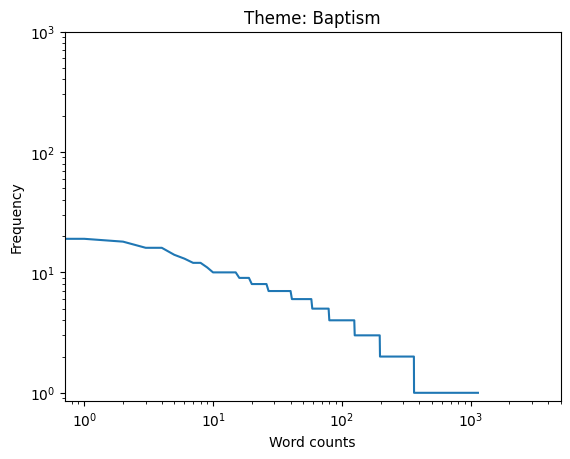

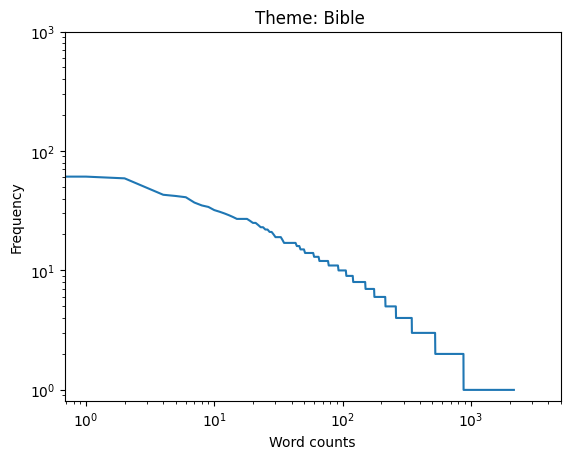

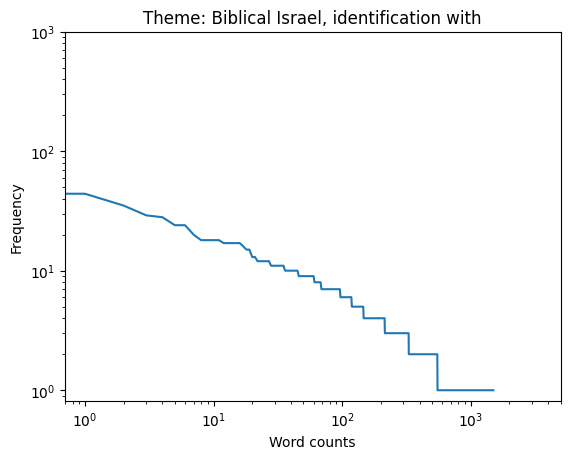

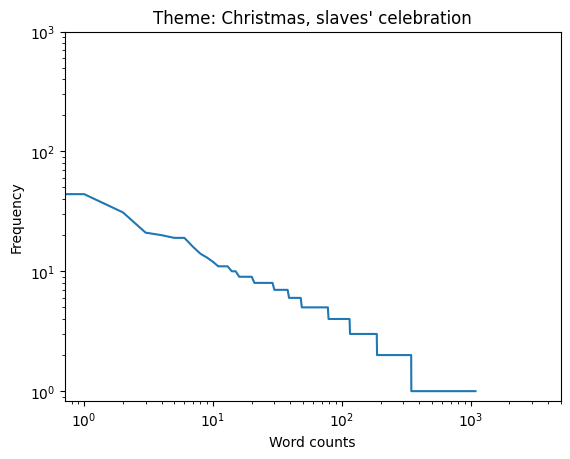

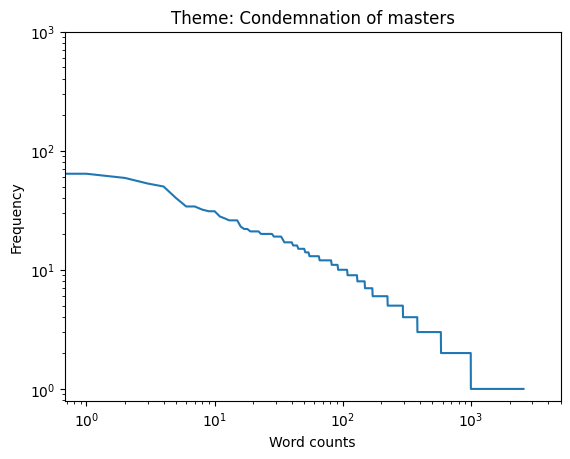

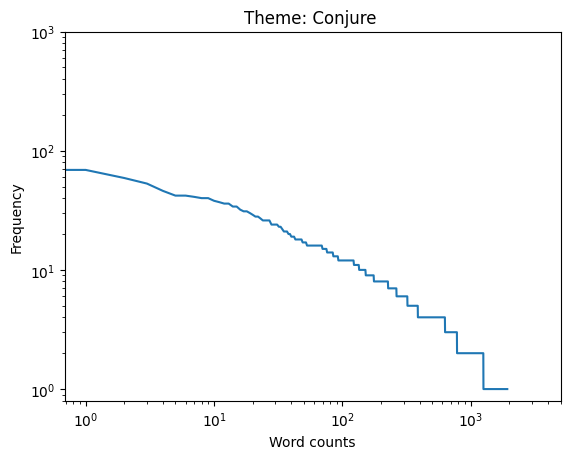

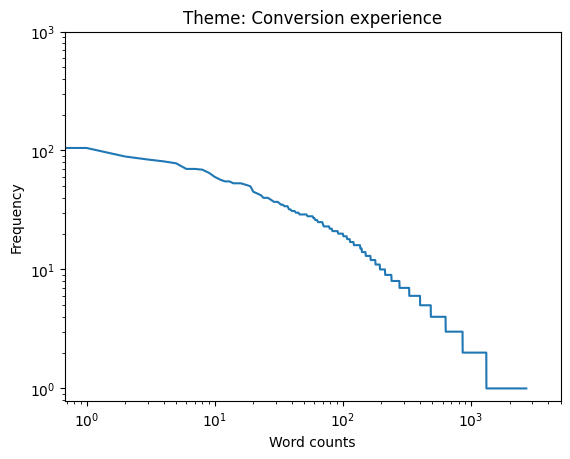

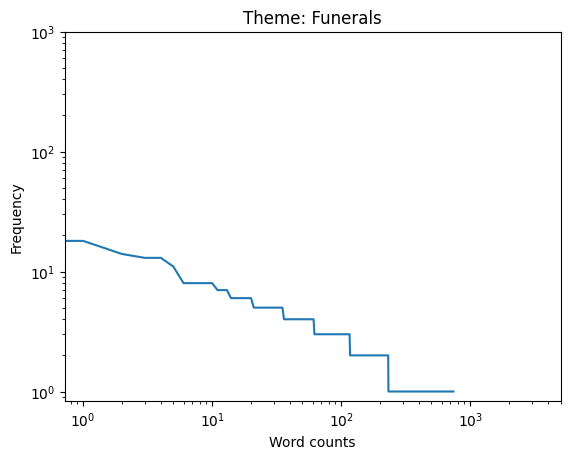

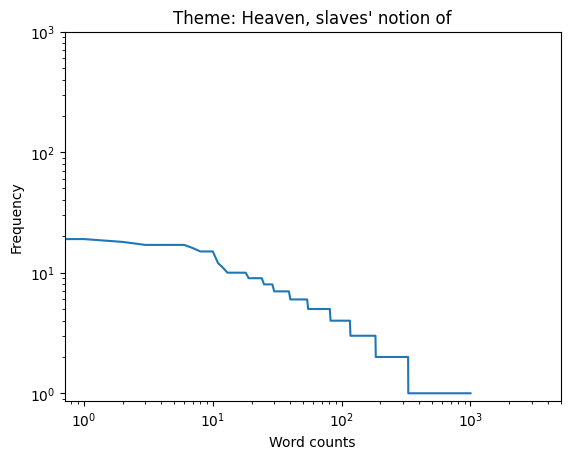

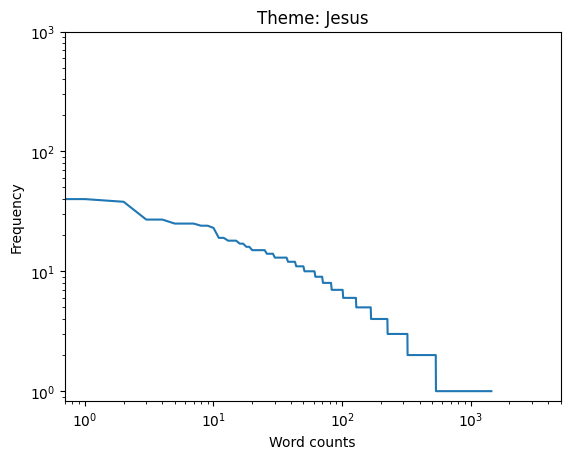

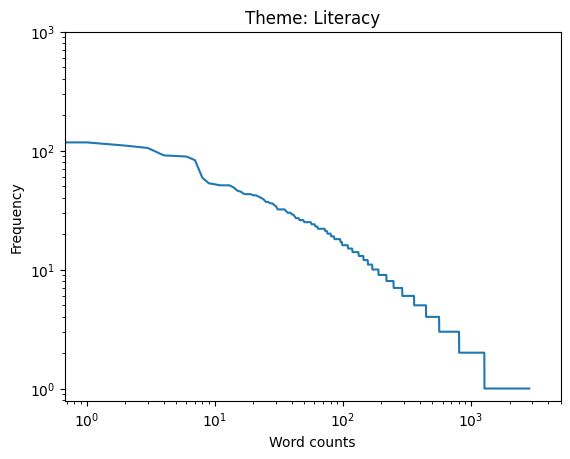

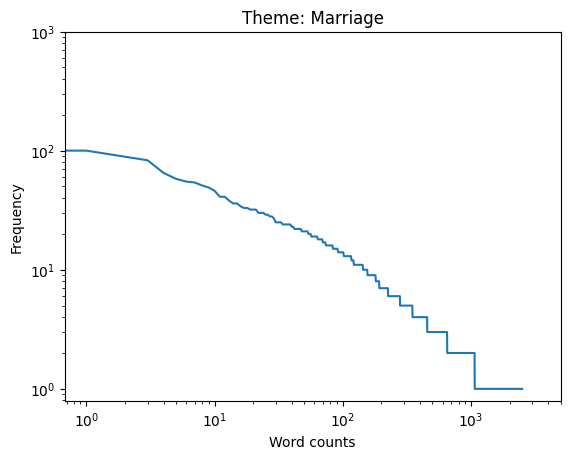

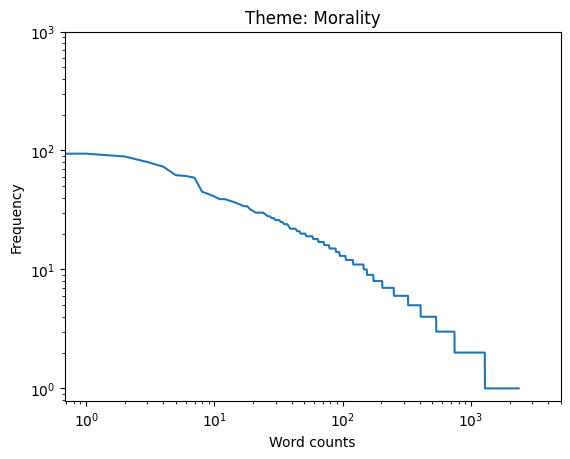

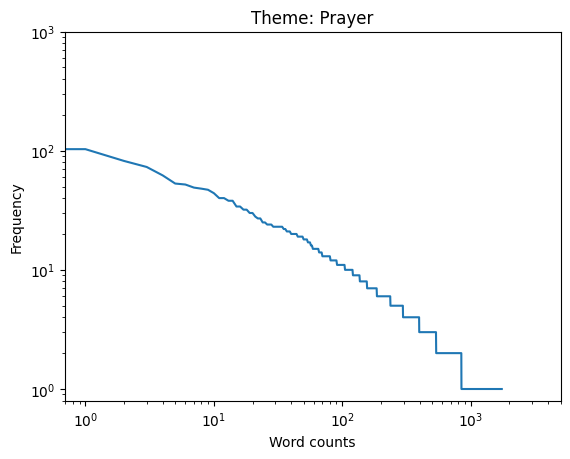

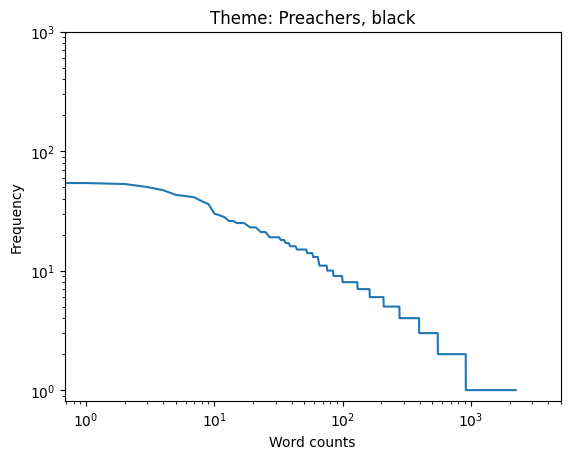

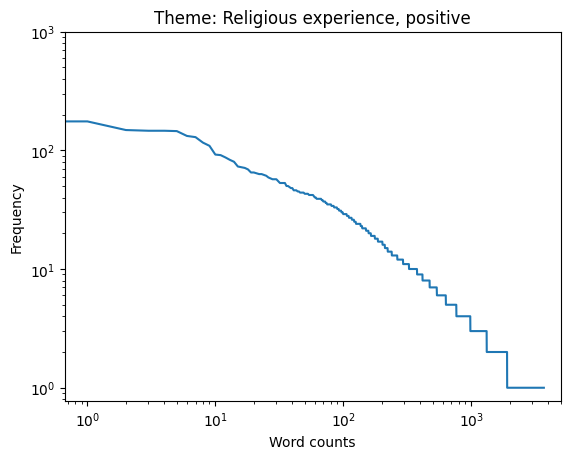

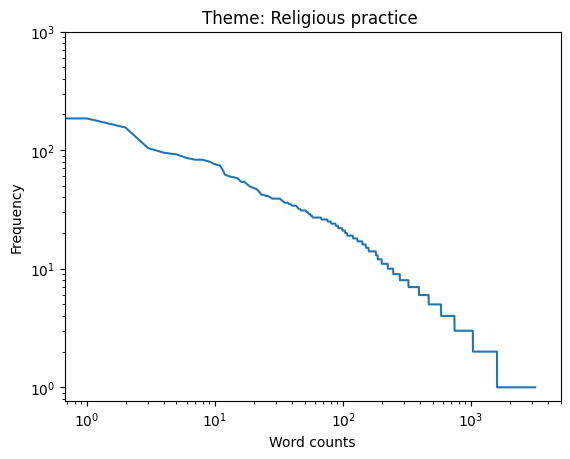

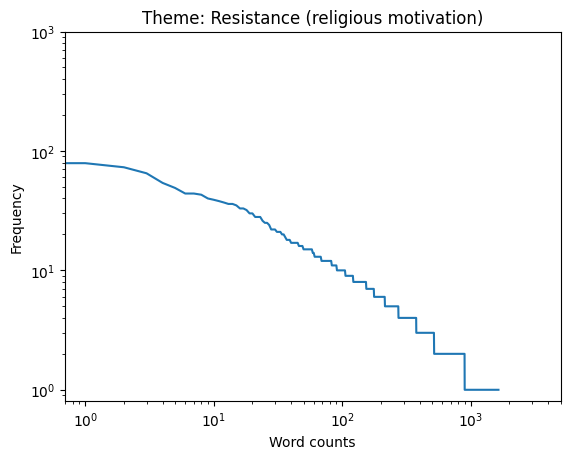

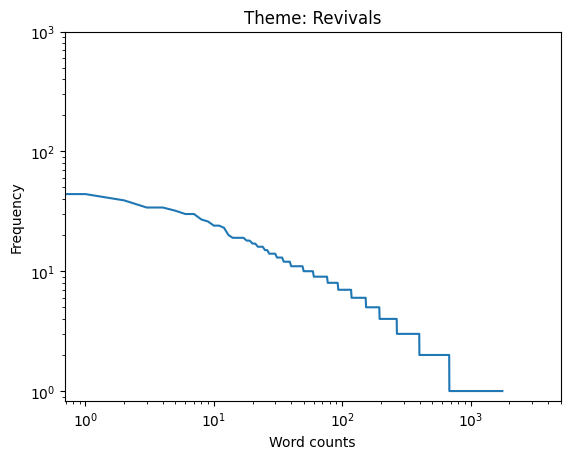

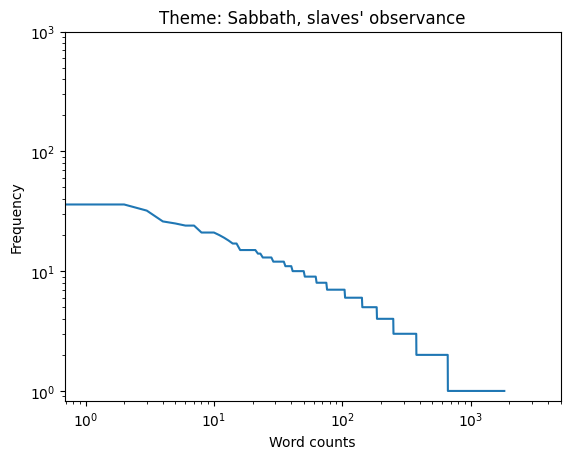

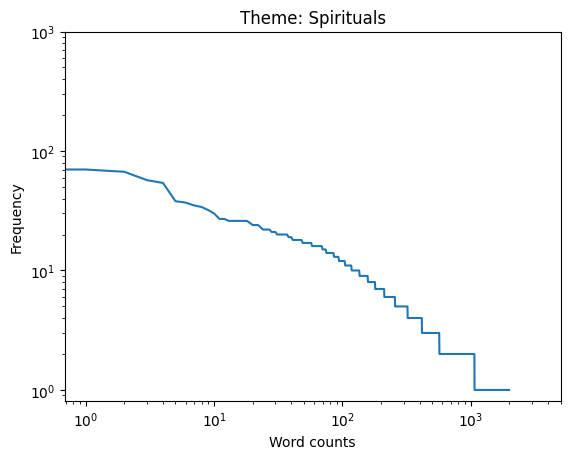

In [22]:
# plot 
import matplotlib.pyplot as plt

for i in range(len(theme_names)):
    theme_name = clear_theme_names[i]
    counts = thematic_word_counts[i]
    sorted_word_counts = sorted(list(counts.values()), reverse=True)

    fig, ax = plt.subplots()
    ax.loglog(sorted_word_counts)
    ax.set_title(f"Theme: {theme_name}")
    ax.set_xlabel("Word counts")
    ax.set_ylabel("Frequency")
    ax.set(xlim=(0, 5000), ylim=(0, 10**3))
    plt.show()


### Theme Classifier

In [21]:
classifier_df = new_df.copy()
classifier_df

,theme,title,year,text
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien..."
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ..."
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...
...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ..."


In [26]:
# get a list of all words across all genres

all_words_clean = []
ct = 0

for doc in unique_words:
    for word in doc:
        if word not in all_words_clean:
            ct += 1
            all_words_clean.append(word)

ct

9978

In [38]:
import re

ordinal_text_search = "(([1-9]|[1-9][0-9])([a-z]|[A-Z])([a-z]|[A-Z]))"
test_text = "The 3rd and the 18th days"
testreg = re.sub(ordinal_text_search, " ",test_text)
testreg

'The   and the   days'

In [39]:
# tokenize individual texts
from nlp_utils import lemmatize_words, remove_stopwords
import re

ordinal_text_search = "(([1-9]|[1-9][0-9])([a-z]|[A-Z])([a-z]|[A-Z]))"
extra_stopwords = ["" , " ", "\n", "'s"]


data = classifier_df["text"]
tokenized_texts=[]
for text in data:
    removed_ordinals = re.sub(ordinal_text_search, " ", text)
    base_text = remove_stopwords(removed_ordinals, extra_stopwords)
    lemmatized = lemmatize_words(base_text)
    tokenized_texts.append(lemmatized)
classifier_df["tokenized_texts"] = tokenized_texts
classifier_df

,theme,title,year,text,tokenized_texts
0,Baptism,Narrative of Henry Box Brown,1849,slavery is dissolved. The slave's wife is ...,"[slavery, dissolved, slave, wife, master, may,..."
1,Baptism,Biography of an American Bondman,"1856, c1855","Haskell, the overseer, experien...","[haskell, overseer, experienced, religion, tim..."
2,Baptism,Memoir of Mrs. Chloe Spear,1832,"herself entirely alone, she fell on her ...","[entirely, alone, fell, knee, broken, accent, ..."
3,Baptism,Life of George Henry,1894,to bind all that called upon the name of...,"[bind, called, upon, name, lord, bring, jerusa..."
4,Baptism,Twenty-Eight Years a Slave,1909,But now I thought that if my master would...,"[thought, master, would, come, jesus, could, s..."
...,...,...,...,...,...
383,Spirituals,Reminiscences of Isaac and Sukey,1907,Sukey Bat Moore on the Art of Flying. ...,"[sukey, bat, moore, art, flying, one, summer, ..."
384,Spirituals,Uncle Johnson,1860,charm. They would come forth as spontane...,"[charm, would, come, forth, spontaneously, nat..."
385,Spirituals,Days of Bondage,1883,on Tuesday morning--this was Sunday nigh...,"[tuesday, morning, sunday, night, house, five,..."
386,Spirituals,The Kidnapped and the Ransomed,1856,"you to go to the gin-house, and get Ann ...","[go, gin-house, get, ann, eliza, give, one, go..."


In [44]:
newword_ct = []
for word_list in classifier_df["tokenized_texts"]:
    newword_ct += word_list

len(set(newword_ct))

10000

In [ ]:
import numpy as np
# use newword_ct as a list of all words in my docs

# initialize matrix for word count feature across all words
word_count_feature = np.zeros()

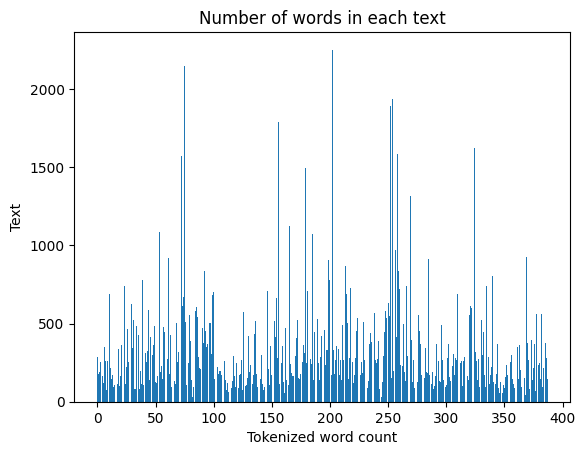

Min:30
Max:2250


In [25]:
# visual of len of each tokenized text
import matplotlib.pyplot as plt
# plot len of unique words
#x = text ID, y = len(tokenized text)

num_words = [len(words) for words in tokenized_texts]
fig, ax = plt.subplots()
ax.bar(range(len(tokenized_texts)),num_words)
ax.set_title("Number of words in each text")
ax.set_ylabel("Text")
ax.set_xlabel("Tokenized word count")
# plt.xticks(rotation = 90)
plt.show()
min_len = min(num_words)
max_len = max (num_words)
print(f"Min:{min_len}")
print(f"Max:{max_len}")

In [26]:
from utils import is_numeric
# remove question marks and year ranges from year column
single_yr = []
year_iterator = len(classifier_df["year"])
for i in range(year_iterator):
    year = classifier_df["year"][i]
    numeric =  True if is_numeric(year) else False
    if numeric:
        single_yr.append(int(year))
        i += 1
    else:
        built_yr = ""

        year_chars = year
        j = 0
        while j <= len(year_chars):
            char = year_chars[j]
            numeric =  True if is_numeric(char) else False
            is_circa = True if year_chars[0] == "c" else False
            if is_circa and j == 0:
                #remove c and start checks
                j += 1       
            elif numeric:
                built_yr += char
                j += 1
            else:
                single_yr.append(int(built_yr))
                break

                # is_numeric =  True if is_numeric(char) else False
     

In [27]:
# get word counts for each text
from collections import Counter

text_word_counts = []
for tokenized_text in tokenized_texts:
    text_word_counts.append(Counter(tokenized_text))

# calculate freq from counts
text_lens = [len(text) for text in tokenized_texts]
text_freq_dicts = []
for i in range(len(text_word_counts)):
    one_dict = text_word_counts[i]
    temp_freq_dict = {}
    for key in one_dict.keys():
        old_value = one_dict[key]
        divide_by = text_lens[i]
        temp_freq_dict[key] = old_value / divide_by
    text_freq_dicts.append(temp_freq_dict)

#for item in word_count
# item[key] = item[key] + 100
# total_len = len(text)

In [28]:
labels = classifier_df["theme"].to_list()
data = pd.DataFrame({"tokenized_texts":classifier_df["tokenized_texts"], "year":single_yr})
data["word_counts"] = text_word_counts
data["word_freq"] = text_freq_dicts
data

,tokenized_texts,year,word_counts,word_freq
0,"[slavery, dissolved, slave, wife, master, may,...",1849,"{'slavery': 2, 'dissolved': 1, 'slave': 15, 'w...","{'slavery': 0.006993006993006993, 'dissolved':..."
1,"[haskell, overseer, experienced, religion, tim...",1856,"{'haskell': 2, 'overseer': 4, 'experienced': 1...","{'haskell': 0.011363636363636364, 'overseer': ..."
2,"[entirely, alone, fell, knee, broken, accent, ...",1832,"{'entirely': 1, 'alone': 1, 'fell': 1, 'knee':...","{'entirely': 0.005319148936170213, 'alone': 0...."
3,"[bind, called, upon, name, lord, bring, jerusa...",1894,"{'bind': 1, 'called': 1, 'upon': 2, 'name': 1,...","{'bind': 0.00398406374501992, 'called': 0.0039..."
4,"[thought, master, would, come, jesus, could, s...",1909,"{'thought': 1, 'master': 4, 'would': 1, 'come'...","{'thought': 0.006134969325153374, 'master': 0...."
...,...,...,...,...
383,"[sukey, bat, moore, art, flying, one, summer, ...",1907,"{'sukey': 3, 'bat': 1, 'moore': 1, 'art': 1, '...","{'sukey': 0.03125, 'bat': 0.010416666666666666..."
384,"[charm, would, come, forth, spontaneously, nat...",1860,"{'charm': 1, 'would': 2, 'come': 1, 'forth': 1...","{'charm': 0.0045871559633027525, 'would': 0.00..."
385,"[tuesday, morning, sunday, night, house, five,...",1883,"{'tuesday': 1, 'morning': 1, 'sunday': 2, 'nig...","{'tuesday': 0.0026455026455026454, 'morning': ..."
386,"[go, gin-house, get, ann, eliza, give, one, go...",1856,"{'go': 1, 'gin-house': 2, 'get': 1, 'ann': 2, ...","{'go': 0.0035971223021582736, 'gin-house': 0.0..."


In [29]:
# build a feature extractor

def word_extractor(words):
    """
    Given a list of words, return a dict with each word as a key and whether that word is in the text (boolean) as a value.
    Input:
        [words]
    Output:
        {word: True}
    """
    word_words = set(words)
    features = {}
    for word in words:
        features['contains({})'.format(word)] = (word in word_words)
    return features

def document_features(word_list, all_words):
    """ 
    Given a list of all words, return a dictionary stating which document words are and aren't in the list of all words.
    Input: 
        [word_list]; words in a document
        [all_words]; words in all documents
    Output:
        {contains(word): Boolean}
    """
    document =  " ".join(word_list)
    document_words = set(document)
    features = {}
    for word in all_words:
        features['contains({})'.format(word)] = (word in document_words)
    return features

def combine_dicts(lists):
    """
    Combine n dictionaries.
    Input:
        [{dicts}],[{dicts}]; lists (of dicts)
    Output:
        [{combined dicts}]; list of combined dicts
    """

    combo_dicts = []
    first_dictionary_len = len(lists[0])
    for i in range(first_dictionary_len):
        temp_dict = {}
        for dictionary in lists:
            current_dict = dictionary[i]
            add_keys = list(current_dict.keys())
            add_values = list(current_dict.values())
        
            for key, value in zip(add_keys, add_values):
                temp_dict[key] = value

        combo_dicts.append(temp_dict) 
    return combo_dicts

def label_features_sets(feature_dicts,labels):
    """
    Pair feature sets with a label for training and testing.
    Input:
        [feature dictionaries]
        [corresponsing labels]
    Output:
        [(feature_dict,label)]; list of tuples
    """
    return [(feature_dict, label) for feature_dict, label in zip(feature_dicts,labels)]


In [30]:
yr_as_list = data["year"].tolist() 
words_as_list = data["tokenized_texts"].tolist()
word_counts_list = data["word_counts"].tolist()
word_freq_list = data["word_freq"].tolist()

# tokenized_text -> dicts
# word_dicts = []
# for each in words_as_list:
#     word_dicts.append(word_extractor(each))

all_words = []
for lists in words_as_list:
    all_words.extend(lists)

doc_dicts = []
for each in words_as_list:
    doc_dicts.append(document_features(each, all_words))

# years -> dicts
year_dicts = []
for year in yr_as_list:
    year_dicts.append({"year":year})

# calculated weighted word counts

# combine dicts
to_combine = [doc_dicts,word_counts_list]
feauture_dicts = combine_dicts(to_combine)

In [40]:
len(year_dicts)

388

In [31]:
# # test,train,validation split
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(feauture_dicts, labels, test_size=0.3)

In [32]:
# # classifier
# from nltk.classify import NaiveBayesClassifier

# classifier = NaiveBayesClassifier.train(label_features_sets(x_train,y_train))

In [33]:
# from nltk.classify import accuracy
# # print(classifier.classify(x_test[2]))
# # print(y_test[2])
# print(accuracy(classifier, label_features_sets(x_test,y_test)))



0.05128205128205128


In [34]:
# classifier.show_most_informative_features(n=100)
# #TODO: add in word counts as another feature

Most Informative Features
                   mixed = 1              Conjur : Religi =     15.1 : 1.0
                 entered = 1              Conjur : Religi =     14.5 : 1.0
                 account = 1              Conjur : Religi =     13.9 : 1.0
                   speak = 1              Conjur : Religi =     13.3 : 1.0
                    read = None           Morali : Litera =     12.9 : 1.0
                  waited = 1              Resist : Religi =     12.8 : 1.0
                    limb = 1              Conjur : Religi =     12.4 : 1.0
                   spent = 1              Resist : Religi =     12.0 : 1.0
                  corner = 1              Conjur : Religi =     11.8 : 1.0
                 dressed = 1              Conjur : Religi =     11.8 : 1.0
                  living = 1              Conjur : Religi =     11.8 : 1.0
                  strong = 1              Conjur : Religi =     11.8 : 1.0
                baptized = 2              Baptis : Religi =     11.3 : 1.0

This naive bayes model is only 6.8% accuurate.

features:
- tokenized text
- word frequency 
- year the text was published

Current feature approach: bag of words

To incorporate next: Term Frequency-Inverse Document Frequency (TF-IDF)

Steps:
    1. Tokenize words


    2. Get frequency of each word (word_freq_list; count of each term/num of words in each doc)


    3. Calc inverse doc frequency. The inverse document frequency (IDF) of a word is a measure of how important it is in the entire corpus, i.e., across all documents. The IDF of a word is calculated as:
        IDF(word) = log((Total number of documents in the corpus) / (Number of documents containing the word))
        a. first I'll treat the entire doc set as a corpus.
        b. if this isn't too accurate, I'll try treating each theme as it's own corpus
    
    4. Calculation of TF-IDF: The final step is to calculate the TF-IDF score of each word, which is the product of its TF and IDF values. This is calculated as:
        TF-IDF(word) = TF(word) * IDF(word)
    The TF-IDF score of a word is high when it appears frequently in a document but rarely in the corpus, indicating that it is an important and distinctive feature of the document.


In [37]:
import numpy as np

corpus = tokenized_texts
corpus_wordset = set()
for word_set in corpus:
    corpus_wordset.update(word_set)

n_docs = len(corpus)
n_words_set = len(corpus_wordset)

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=list(corpus_wordset))

#calc term freq, put in df
for i in range(n_docs):
    words = corpus[i]
    for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))
        
df_tf


,faced,persisted,passer-by,unruly,presuming,refusing,foolish,divided,hobbled,possessor,...,finding,warehouse,galley,metre,peaceful,sinned,weaken,meanest,intimated,manifest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [38]:
def calculate_idf(corpus, word):
    """ 
    Calculation: log((Total number of documents in the corpus) / (Number of documents containing the word))

    Input: 
        [corpus]; list of tokenized texts
        "word"; str

    Output: 
        {word:idf}
            "word"; str
            idf; float
    """
    
    corpus_len = len(corpus)
    doc_counter = 0
    
    # counterized_texts = []
    # for text in corpus:
    # counterized_texts.append(Counter(text))
    for document in corpus:
        contains_word = True if word in document else False
        if contains_word:
            doc_counter += 1
    
    
    idf = np.log(corpus_len / doc_counter)

    return {word:idf}

idf_dict = {}
for a_word in corpus_wordset:
    temp_dict = calculate_idf(corpus=corpus, word = a_word) 
    idf_dict.update(temp_dict)

In [39]:
# calculate tf_idf, save to df
df_tf_idf = df_tf.copy()

for word in corpus_wordset:
    idf = idf_dict.get(word, 0)
    for i in range(n_docs):
        df_tf_idf[word][i] = df_tf[word][i] * idf
        
df_tf_idf

,faced,persisted,passer-by,unruly,presuming,refusing,foolish,divided,hobbled,possessor,...,finding,warehouse,galley,metre,peaceful,sinned,weaken,meanest,intimated,manifest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [47]:
# import numpy as np
# from collections import Counter
# # 1. tokenized words
# # tokenized_texts

# # 2. freq of each word in each doc
# word_freq_list

# def calculate_tf(word, document):
    
#     # alternate calc
#     # log(1+freq_word)
#     return text_word_counts.append(Counter(tokenized_text))

# # 3. Cal inverse doc freq
# def calculate_idf(corpus, word):
#     """ 
#     Calculation: log((Total number of documents in the corpus) / (Number of documents containing the word))

#     Input: 
#         [corpus]; list of tokenized texts
#         "word"; str

#     Output: 
#         {word:idf}
#             "word"; str
#             idf; float
#     """
    
#     corpus_len = len(corpus)
#     doc_counter = 0
    
#     # counterized_texts = []
#     # for text in corpus:
#     # counterized_texts.append(Counter(text))
#     for document in corpus:
#         contains_word = True if word in document else False
#         if contains_word:
#             doc_counter += 1
    
    
#     idf = np.log(corpus_len / doc_counter)

#     return {word:idf}


In [64]:
# def get_tf_idf(word, tf, idf):
#     """ 
#     Calculation: TF(word) * IDF(word)
#     Input:
#         tf; float, the term frequency within one document
#         idf; float, the inverse document frequency
#     Output:
#         {word:tf_idf}
    
#     """
#     tf_idf = tf / idf
#     return {word:tf_idf}
    
    

In [ ]:
# make tf_idf matrix
# {word:tf_idf}

# import math

# def calculate_tf_idf(word, tf_dict, idf_dict):
#     """ 
#     """
#     # Calculate the term frequency of the word
#     tf = tf_dict.get(word, 0)

#     # Calculate the inverse document frequency of the word
#     idf = idf_dict.get(word, 0)

#     # Calculate the TF-IDF score of the word
#     tfidf = tf * idf

#     return tfidf




In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Create a TfidfVectorizer object
# vectorizer = TfidfVectorizer()

# # Fit and transform the corpus into TF-IDF vectors
# # corpus is a list of documents
# tfidf_matrix = vectorizer.fit_transform(corpus)

# # Get the feature names (i.e., the words) of the TF-IDF vectors
# feature_names = vectorizer.get_feature_names()

I think I want the tf-idf matrix to look like this
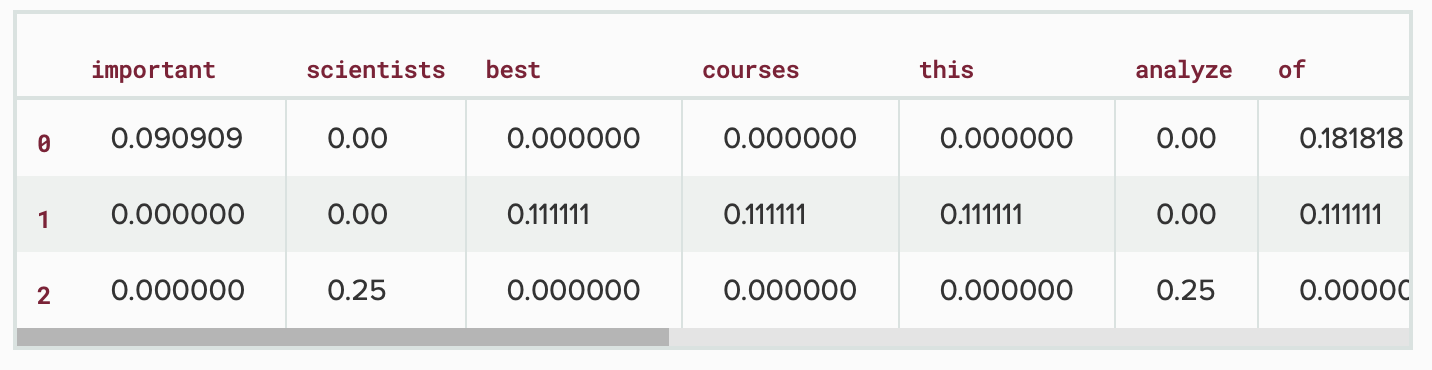

In [ ]:
pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=words_set)